In [1]:
# -*- coding: utf-8 -*-


In [2]:
import sys
sys.getdefaultencoding()

'utf-8'

In [3]:
pip install --upgrade notebook


  Using cached notebook-7.0.6-py3-none-any.whl (4.0 MB)
  Using cached jupyter_server-2.12.1-py3-none-any.whl (380 kB)
  Using cached jupyterlab-4.0.9-py3-none-any.whl (9.2 MB)
  Using cached jupyterlab_server-2.25.2-py3-none-any.whl (58 kB)
  Using cached pyzmq-25.1.2-cp310-cp310-win_amd64.whl (1.2 MB)
  Using cached jupyter_events-0.9.0-py3-none-any.whl (18 kB)
  Using cached jupyter_client-8.6.0-py3-none-any.whl (105 kB)
  Using cached Send2Trash-1.8.2-py3-none-any.whl (18 kB)
  Using cached jupyter_server_terminals-0.5.1-py3-none-any.whl (13 kB)
  Using cached overrides-7.4.0-py3-none-any.whl (17 kB)
  Using cached async_lru-2.0.4-py3-none-any.whl (6.1 kB)
  Using cached jupyter_lsp-2.2.1-py3-none-any.whl (66 kB)
  Using cached jsonschema-4.20.0-py3-none-any.whl (84 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl (18 kB)
  Using cached referencing-0.32.0-py3-none-any.whl (26 kB)
  Using cached attrs-23.

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Garima\\anaconda\\Lib\\site-packages\\~mq\\backend\\cython\\context.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [5]:
match = pd.read_csv("C:\\Users\\Garima\\Downloads\\archive (4)\matches.csv")
delivery = pd.read_csv("C:\\Users\\Garima\\Downloads\\archive (4)\\deliveries.csv")

In [6]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
match.shape

(756, 18)

In [8]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
delivery.shape

(179078, 21)

In [10]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index() # reset.index convert into dataframe


In [11]:
total_score_df.shape



(1528, 3)

In [12]:
total_score_df = total_score_df[total_score_df['inning'] == 1]   # first inning runs


In [13]:
total_score_df.head(5)

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157


In [14]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')


In [15]:
match_df['team1'].unique()


array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [16]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]                                        # currently playing team


In [17]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [18]:
match_df['team1'].unique()


array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala',
       'Pune Warriors', 'Rising Pune Supergiants'], dtype=object)

In [19]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [20]:
match_df.shape


(641, 20)

In [21]:
match_df = match_df[match_df['dl_applied'] == 0]   # not rain affected


In [22]:
match_df = match_df[['match_id','city','winner','total_runs']]


In [23]:
delivery_df = match_df.merge(delivery,on='match_id')



In [24]:
delivery_df = delivery_df[delivery_df['inning'] == 2]   # chasing score


In [25]:
delivery_df.head(5)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [26]:
delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']


In [27]:
delivery_df.head(5)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,2,0,2,NaN,NaN,NaN,3
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,4,0,4,NaN,NaN,NaN,7


In [28]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']


In [29]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])


In [30]:
delivery_df


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,200,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,0,4
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-2,3
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-3,2
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-5,1


In [31]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets'] = 10 - wickets
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,204,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,200,115,10


In [32]:
# Crr Run rate = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [33]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']


In [34]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,206,119,10,6.0,10.386555
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,206,118,10,3.0,10.474576
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,1,206,117,10,2.0,10.564103
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,NaN,NaN,3,204,116,10,4.5,10.551724
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,NaN,NaN,7,200,115,10,8.4,10.434783


In [35]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [36]:
delivery_df['result'] = delivery_df.apply(result,axis=1)


In [37]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]


In [38]:
final_df = final_df.sample(final_df.shape[0])


In [39]:
final_df.sample()


,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
94685,Rajasthan Royals,Royal Challengers Bangalore,Bangalore,98,47,6,190,7.561644,12.510638,1


In [40]:
final_df.isnull().sum()

batting_team      0
bowling_team      0
city            832
runs_left         0
balls_left        0
wickets           0
total_runs_x      0
crr               0
rrr               7
result            0
dtype: int64

In [41]:
final_df.dropna(inplace=True)


In [42]:
final_df = final_df[final_df['balls_left'] != 0]   # if balls 0 Run Rate will be infinity


In [43]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)


In [44]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
29361,Deccan Chargers,Delhi Daredevils,Durban,69,45,7,173,8.320000,9.200000
11265,Kings XI Punjab,Deccan Chargers,Hyderabad,56,41,7,164,8.202532,8.195122
84221,Delhi Daredevils,Chennai Super Kings,Chennai,112,73,7,168,7.148936,9.205479
99463,Kings XI Punjab,Delhi Daredevils,Chandigarh,99,101,9,115,5.052632,5.881188
70941,Royal Challengers Bangalore,Deccan Chargers,Hyderabad,104,106,10,132,12.000000,5.886792
...,...,...,...,...,...,...,...,...,...
124143,Chennai Super Kings,Kings XI Punjab,Mohali,24,12,6,198,9.666667,12.000000
51340,Chennai Super Kings,Mumbai Indians,Mumbai,62,42,6,164,7.846154,8.857143
130449,Kings XI Punjab,Rajasthan Royals,Jaipur,54,19,5,161,6.356436,17.052632
61647,Kolkata Knight Riders,Kings XI Punjab,Kolkata,9,9,4,134,6.756757,6.000000


In [45]:
pd.get_dummies(X_train,columns=['batting_team','bowling_team',"city"])

,runs_left,balls_left,wickets,total_runs_x,crr,rrr,batting_team_Chennai Super Kings,batting_team_Deccan Chargers,batting_team_Delhi Capitals,batting_team_Delhi Daredevils,...,city_Kolkata,city_Mohali,city_Mumbai,city_Nagpur,city_Port Elizabeth,city_Pune,city_Raipur,city_Ranchi,city_Sharjah,city_Visakhapatnam
29361,69,45,7,173,8.320000,9.200000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11265,56,41,7,164,8.202532,8.195122,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84221,112,73,7,168,7.148936,9.205479,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
99463,99,101,9,115,5.052632,5.881188,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70941,104,106,10,132,12.000000,5.886792,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124143,24,12,6,198,9.666667,12.000000,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
51340,62,42,6,164,7.846154,8.857143,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
130449,54,19,5,161,6.356436,17.052632,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61647,9,9,4,134,6.756757,6.000000,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [48]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [49]:
pipe.fit(X_train,y_train)


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [50]:
y_pred = pipe.predict(X_test)


In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8031396734178989

In [52]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [53]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
10459,1,4,0,55.5,44.5
10467,2,8,0,49.9,50.1
10473,3,1,0,56.7,43.3
10479,4,7,1,68.2,31.8
10485,5,12,0,57.9,42.1
10491,6,13,0,45.6,54.4
10497,7,9,0,39.7,60.3
10505,8,15,0,26.2,73.8
10511,9,7,0,24.1,75.9
10518,10,17,0,13.1,86.9


Text(0.5, 1.0, 'Target-178')

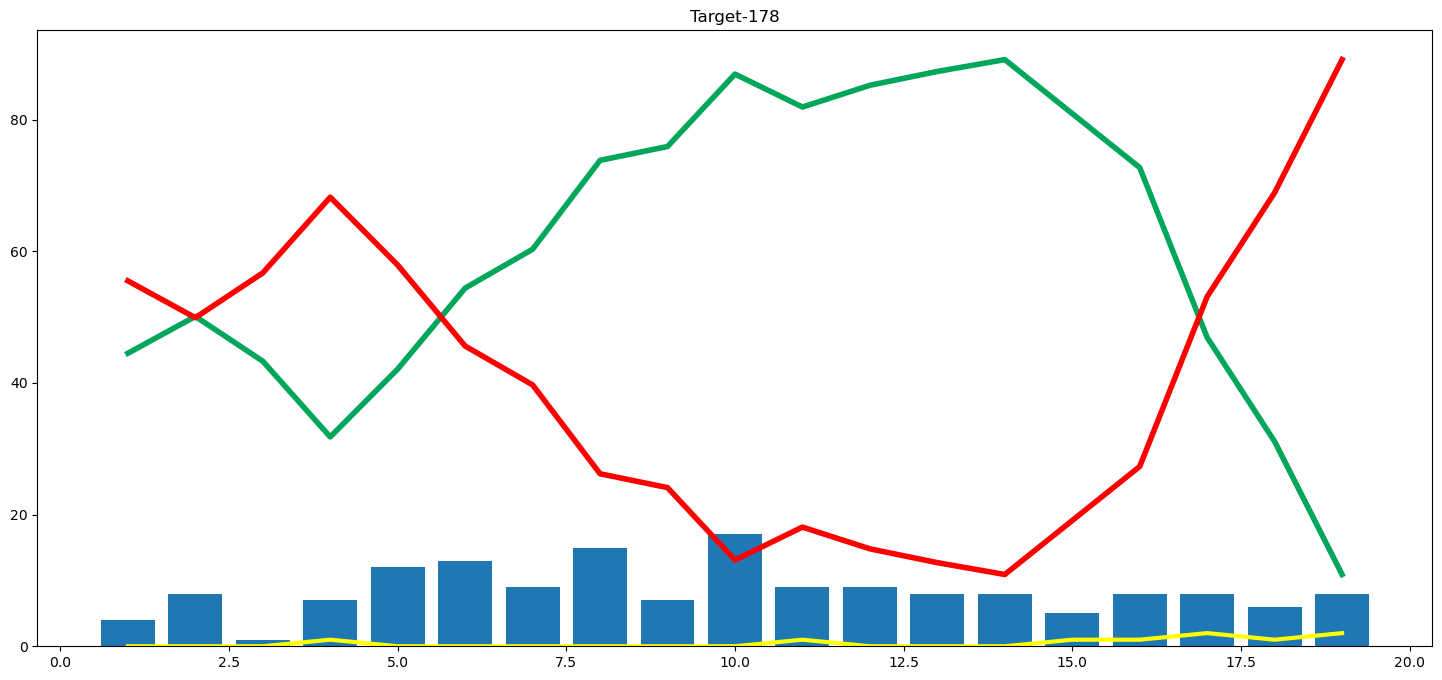

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [55]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [56]:
delivery_df['city'].unique()


array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [57]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

In [58]:
try:
    pickle.dump(pipe, open('pipe.pkl', 'wb'))
except Exception as e:
    print(f"Error: {e}")

In [59]:
print(pipe)


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])


In [60]:
import os

file_path = os.path.abspath('pipe.pkl')
pickle.dump(pipe, open(file_path, 'wb'))

In [61]:
# Load the pipeline from the 'pipe.pkl' file
with open('pipe.pkl', 'rb') as file:
    loaded_pipe = pickle.load(file)

# Inspect the loaded pipeline
print(loaded_pipe)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])
